# HW 4-1

## Classifying Movie reviews

**Import and prepare IMDB dataset**

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels)= imdb.load_data(num_words=10000)

# Convert imdb review data to vectorized sequence
# each dimension corresponds to a word in the dictionary 
# the value is words frequencey
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Split training data into validation and training set**

In [6]:
# Validation Set
x_val = x_train[:10000]  
y_val = y_train[:10000] 

# Training Set
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


Check that the models used so far are reasonable.

While keeping other parameters the same as before:
* Try using one, two or three intermediate layers instead of two. See how doing 
so affects validation and test accuracy
* Try using layers with more units or fewer units: 8 units vs 16 units vs 32 units
* Try using the mse loss function instead of binary_crossentropy

## Summary

The data in the table below summarizes the training, validation, and testing accuracy at the optimal number of epochs for the 9 models. For each of the models we consider "relu" actiavtion functions as well as "mse" loss.
Below these tables the code can be found along with training/validation accuracy plots for each model.

**8** nodes per layer |1 Hidden Layer |2 Hidden Layers |3 Hidden Layers
:---:|:---:|:---:|:---:
Optimal Number of Epochs |3|5|5
Training Accuracy |0.933|0.950|0.943
Validation Accuracy |0.892|0.887|0.879
Testing Accuracy |0.878|0.880|0.859

16 nodes per layer |1 Hidden Layer |2 Hidden Layers |3 Hidden Layers
:---:|:---:|:---:|:---:
Optimal Number of Epochs |4|3|4
Training Accuracy |0.950|0.918|0.953
Validation Accuracy |0.889|0.867|0.886
Testing Accuracy |0.882|0.852|0.877

**32** nodes per layer |1 Hidden Layer |2 Hidden Layers |3 Hidden Layers
:---:|:---:|:---:|:---:
Optimal Number of Epochs |4|3|4
Training Accuracy |0.958|0.948|0.966
Validation Accuracy |0.894|0.887|0.891
Testing Accuracy |0.886|0.879|0.876

## Models

**Model 1**
* 2 Hidden Layers
* 16 nodes (relu activation)
* mean square error (mse) loss

In [92]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20


2022-03-03 10:02:58.217355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.7655

2022-03-03 10:02:59.664417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 42ms/step - loss: 0.1831 - accuracy: 0.7655 - val_loss: 0.1302 - val_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1087 - accuracy: 0.8816 - val_loss: 0.1055 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0792 - accuracy: 0.9129 - val_loss: 0.0887 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0620 - accuracy: 0.9330 - val_loss: 0.0913 - val_accuracy: 0.8806
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0514 - accuracy: 0.9437 - val_loss: 0.0832 - val_accuracy: 0.8929
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.9574 - val_loss: 0.1017 - val_accuracy: 0.8647
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.9646 - val_loss: 0.0848 - val_accuracy: 0.8879
Epoch 8/20
30/30 [======

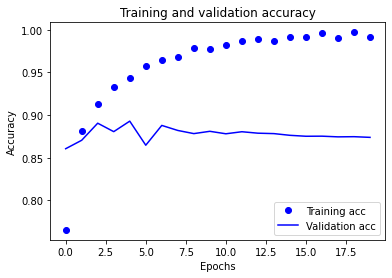

In [93]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **3**

In [ ]:
num_epochs = 3
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

In [16]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.1146 - accuracy: 0.8520
 Training accuracy: 0.9182666540145874
 Validation accuracy: 0.8666000366210938
 Testing accuracy: 0.8520000576972961


**Model 2**
* 3 Hidden Layers
* 16 nodes (relu activation)
* mean square error (mse) loss

In [17]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:11:34.740633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 34ms/step - loss: 0.1913 - accuracy: 0.7365 - val_loss: 0.1343 - val_accuracy: 0.8493
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.1108 - accuracy: 0.9023

2022-03-03 09:11:35.852771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.1095 - accuracy: 0.8745 - val_loss: 0.0999 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0757 - accuracy: 0.9129 - val_loss: 0.0870 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0620 - accuracy: 0.9269 - val_loss: 0.0838 - val_accuracy: 0.8953
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0487 - accuracy: 0.9451 - val_loss: 0.0956 - val_accuracy: 0.8734
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.9522 - val_loss: 0.0965 - val_accuracy: 0.8714
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.9608 - val_loss: 0.0843 - val_accuracy: 0.8879
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0277 - accuracy: 0.9700 - val_loss: 0.0868 - val_accuracy: 0.8857
Epoch 9/20
30/30 [======

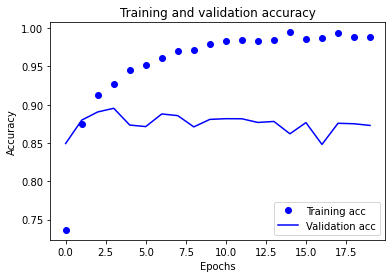

In [18]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [20]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-03 09:15:00.957911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 33ms/step - loss: 0.1907 - accuracy: 0.7397 - val_loss: 0.1341 - val_accuracy: 0.8502
Epoch 2/4
 1/30 [>.............................] - ETA: 0s - loss: 0.1263 - accuracy: 0.8809

2022-03-03 09:15:02.003763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.1082 - accuracy: 0.8792 - val_loss: 0.1024 - val_accuracy: 0.8754
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.0770 - accuracy: 0.9124 - val_loss: 0.0889 - val_accuracy: 0.8879
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.0608 - accuracy: 0.9312 - val_loss: 0.0875 - val_accuracy: 0.8859


In [21]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0938 - accuracy: 0.8765
 Training accuracy: 0.9534000158309937
 Validation accuracy: 0.8859000205993652
 Testing accuracy: 0.876520037651062


**Model 3**
* 1 Hidden Layers
* 16 nodes (relu activation)
* mean square error (mse) loss

In [26]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
 7/30 [======>.......................] - ETA: 0s - loss: 0.2343 - accuracy: 0.6336

2022-03-03 09:17:44.106395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 32ms/step - loss: 0.1858 - accuracy: 0.7483 - val_loss: 0.1326 - val_accuracy: 0.8542
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.1193 - accuracy: 0.8984

2022-03-03 09:17:45.035131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 13ms/step - loss: 0.1050 - accuracy: 0.8907 - val_loss: 0.1034 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0810 - accuracy: 0.9157 - val_loss: 0.0906 - val_accuracy: 0.8932
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0670 - accuracy: 0.9306 - val_loss: 0.0854 - val_accuracy: 0.8965
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0554 - accuracy: 0.9443 - val_loss: 0.0836 - val_accuracy: 0.8945
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0477 - accuracy: 0.9529 - val_loss: 0.0956 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0431 - accuracy: 0.9577 - val_loss: 0.0895 - val_accuracy: 0.8795
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0366 - accuracy: 0.9655 - val_loss: 0.1032 - val_accuracy: 0.8588
Epoch 9/20
30/30 [======

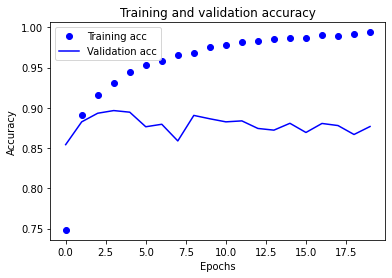

In [27]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [28]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
 1/30 [>.............................] - ETA: 7s - loss: 0.2600 - accuracy: 0.4902

2022-03-03 09:18:36.212075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 34ms/step - loss: 0.1815 - accuracy: 0.7569 - val_loss: 0.1388 - val_accuracy: 0.8382
Epoch 2/4
 1/30 [>.............................] - ETA: 0s - loss: 0.1279 - accuracy: 0.8652

2022-03-03 09:18:37.198044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 16ms/step - loss: 0.1058 - accuracy: 0.8895 - val_loss: 0.1001 - val_accuracy: 0.8881
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.0795 - accuracy: 0.9185 - val_loss: 0.0913 - val_accuracy: 0.8903
Epoch 4/4
30/30 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9305 - val_loss: 0.0878 - val_accuracy: 0.8894


In [29]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0938 - accuracy: 0.8818
 Training accuracy: 0.949733316898346
 Validation accuracy: 0.889400064945221
 Testing accuracy: 0.8817600607872009


**Model 4**
* 2 Hidden Layers
* 8 nodes (relu activation)
* mean square error (mse) loss

In [30]:
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:20:18.582671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 38ms/step - loss: 0.1862 - accuracy: 0.7631 - val_loss: 0.1443 - val_accuracy: 0.8541
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.1341 - accuracy: 0.8633

2022-03-03 09:20:20.127326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 18ms/step - loss: 0.1183 - accuracy: 0.8795 - val_loss: 0.1161 - val_accuracy: 0.8701
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0867 - accuracy: 0.9122 - val_loss: 0.1042 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0718 - accuracy: 0.9242 - val_loss: 0.0921 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0600 - accuracy: 0.9389 - val_loss: 0.0856 - val_accuracy: 0.8927
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0514 - accuracy: 0.9489 - val_loss: 0.0842 - val_accuracy: 0.8936
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0446 - accuracy: 0.9571 - val_loss: 0.0840 - val_accuracy: 0.8924
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.9624 - val_loss: 0.0884 - val_accuracy: 0.8847
Epoch 9/20
30/30 [======

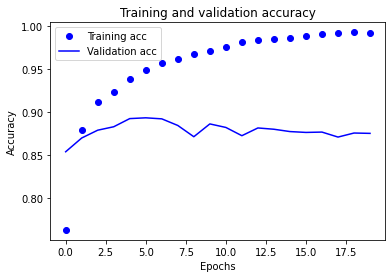

In [31]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **5**

In [38]:
num_epochs = 5
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5


2022-03-03 09:26:39.306718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.1848 - accuracy: 0.7556 - val_loss: 0.1459 - val_accuracy: 0.8314


2022-03-03 09:26:40.400235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1159 - accuracy: 0.8816 - val_loss: 0.1111 - val_accuracy: 0.8810
Epoch 3/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0864 - accuracy: 0.9129 - val_loss: 0.1001 - val_accuracy: 0.8781
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0710 - accuracy: 0.9273 - val_loss: 0.0962 - val_accuracy: 0.8829
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0600 - accuracy: 0.9397 - val_loss: 0.0885 - val_accuracy: 0.8866


In [39]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 2s 3ms/step - loss: 0.0943 - accuracy: 0.8800
 Training accuracy: 0.9501333236694336
 Validation accuracy: 0.8866000175476074
 Testing accuracy: 0.8800000548362732


**Model 5**
* 3 Hidden Layers
* 8 nodes (relu activation)
* mean square error (mse) loss

In [42]:
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:27:23.198798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.2059 - accuracy: 0.7267

2022-03-03 09:27:24.328166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.2059 - accuracy: 0.7267 - val_loss: 0.1506 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1257 - accuracy: 0.8796 - val_loss: 0.1210 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0905 - accuracy: 0.9123 - val_loss: 0.1041 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0722 - accuracy: 0.9267 - val_loss: 0.0923 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0578 - accuracy: 0.9420 - val_loss: 0.0870 - val_accuracy: 0.8920
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0515 - accuracy: 0.9444 - val_loss: 0.0898 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0409 - accuracy: 0.9595 - val_loss: 0.0849 - val_accuracy: 0.8872
Epoch 8/20
30/30 [======

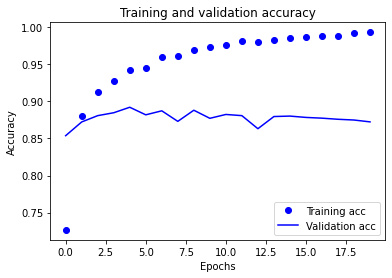

In [43]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **5**

In [44]:
num_epochs = 5
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5


2022-03-03 09:28:00.165463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.7371

2022-03-03 09:28:01.409214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 39ms/step - loss: 0.2036 - accuracy: 0.7371 - val_loss: 0.1767 - val_accuracy: 0.7952
Epoch 2/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1231 - accuracy: 0.8829 - val_loss: 0.1122 - val_accuracy: 0.8827
Epoch 3/5
30/30 [==============================] - 0s 17ms/step - loss: 0.0927 - accuracy: 0.9075 - val_loss: 0.0979 - val_accuracy: 0.8912
Epoch 4/5
30/30 [==============================] - 1s 18ms/step - loss: 0.0718 - accuracy: 0.9297 - val_loss: 0.0976 - val_accuracy: 0.8726
Epoch 5/5
30/30 [==============================] - 0s 17ms/step - loss: 0.0593 - accuracy: 0.9409 - val_loss: 0.0969 - val_accuracy: 0.8791


In [45]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 2s 3ms/step - loss: 0.1079 - accuracy: 0.8590
 Training accuracy: 0.9430000185966492
 Validation accuracy: 0.8791000247001648
 Testing accuracy: 0.8589600324630737


**Model 6**
* 1 Hidden Layers
* 8 nodes (relu activation)
* mean square error (mse) loss

In [46]:
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:28:34.538157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.7622

2022-03-03 09:28:35.640130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 38ms/step - loss: 0.1902 - accuracy: 0.7626 - val_loss: 0.1540 - val_accuracy: 0.8263
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1232 - accuracy: 0.8774 - val_loss: 0.1153 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0937 - accuracy: 0.9027 - val_loss: 0.0983 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0753 - accuracy: 0.9224 - val_loss: 0.0918 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0628 - accuracy: 0.9378 - val_loss: 0.1045 - val_accuracy: 0.8661
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0554 - accuracy: 0.9440 - val_loss: 0.0869 - val_accuracy: 0.8924
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0483 - accuracy: 0.9529 - val_loss: 0.0910 - val_accuracy: 0.8789
Epoch 8/20
30/30 [======

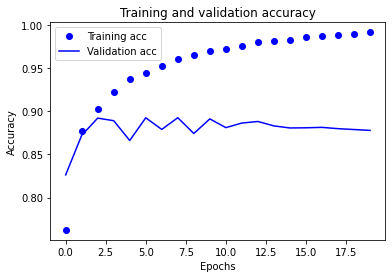

In [47]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **3**

In [48]:
num_epochs = 3
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/3


2022-03-03 09:29:26.085034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.1886 - accuracy: 0.7576 - val_loss: 0.1420 - val_accuracy: 0.8601


2022-03-03 09:29:27.173468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/3
30/30 [==============================] - 0s 16ms/step - loss: 0.1192 - accuracy: 0.8812 - val_loss: 0.1129 - val_accuracy: 0.8729
Epoch 3/3
30/30 [==============================] - 0s 15ms/step - loss: 0.0905 - accuracy: 0.9073 - val_loss: 0.0975 - val_accuracy: 0.8918


In [49]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 2s 3ms/step - loss: 0.1050 - accuracy: 0.8779
 Training accuracy: 0.93340003490448
 Validation accuracy: 0.891800045967102
 Testing accuracy: 0.8778800368309021


**Model 7**
* 2 Hidden Layers
* 32 nodes (relu activation)
* mean square error (mse) loss

In [56]:
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:37:04.828335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.1776 - accuracy: 0.7525 - val_loss: 0.1358 - val_accuracy: 0.8261
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.1206 - accuracy: 0.8574

2022-03-03 09:37:05.938000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.0966 - accuracy: 0.8839 - val_loss: 0.0912 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0721 - accuracy: 0.9123 - val_loss: 0.0831 - val_accuracy: 0.8938
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0569 - accuracy: 0.9326 - val_loss: 0.0912 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0476 - accuracy: 0.9447 - val_loss: 0.0856 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.9591 - val_loss: 0.0822 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.9599 - val_loss: 0.0848 - val_accuracy: 0.8887
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0249 - accuracy: 0.9747 - val_loss: 0.1060 - val_accuracy: 0.8604
Epoch 9/20
30/30 [======

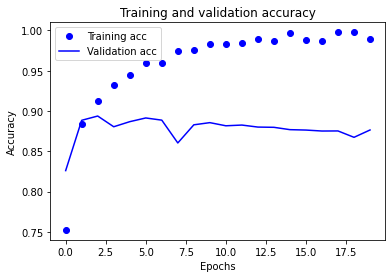

In [57]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **3**

In [58]:
num_epochs = 3
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/3


2022-03-03 09:37:54.381321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.1798 - accuracy: 0.7431 - val_loss: 0.1553 - val_accuracy: 0.7858
Epoch 2/3
 1/30 [>.............................] - ETA: 0s - loss: 0.1273 - accuracy: 0.8340

2022-03-03 09:37:55.498553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.0958 - accuracy: 0.8835 - val_loss: 0.1040 - val_accuracy: 0.8683
Epoch 3/3
30/30 [==============================] - 0s 12ms/step - loss: 0.0714 - accuracy: 0.9144 - val_loss: 0.0865 - val_accuracy: 0.8871


In [59]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0924 - accuracy: 0.8792
 Training accuracy: 0.9481333494186401
 Validation accuracy: 0.8871000409126282
 Testing accuracy: 0.8792400360107422


**Model 8**
* 3 Hidden Layers
* 32 nodes (relu activation)
* mean square error (mse) loss

In [79]:
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:43:00.422804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 37ms/step - loss: 0.1788 - accuracy: 0.7495 - val_loss: 0.1304 - val_accuracy: 0.8343
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.1115 - accuracy: 0.8613

2022-03-03 09:43:01.626027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.0934 - accuracy: 0.8853 - val_loss: 0.1262 - val_accuracy: 0.8274
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0707 - accuracy: 0.9099 - val_loss: 0.0955 - val_accuracy: 0.8708
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0541 - accuracy: 0.9343 - val_loss: 0.0812 - val_accuracy: 0.8937
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0412 - accuracy: 0.9517 - val_loss: 0.1684 - val_accuracy: 0.7842
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.9592 - val_loss: 0.0913 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0333 - accuracy: 0.9599 - val_loss: 0.0853 - val_accuracy: 0.8872
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0230 - accuracy: 0.9745 - val_loss: 0.0886 - val_accuracy: 0.8862
Epoch 9/20
30/30 [======

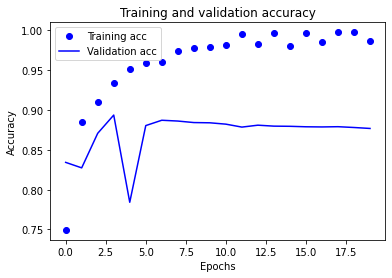

In [81]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [82]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-03 09:46:41.846436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 36ms/step - loss: 0.1827 - accuracy: 0.7438 - val_loss: 0.1321 - val_accuracy: 0.8279


2022-03-03 09:46:43.049930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.0966 - accuracy: 0.8821 - val_loss: 0.1331 - val_accuracy: 0.8167
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.0686 - accuracy: 0.9157 - val_loss: 0.1318 - val_accuracy: 0.8244
Epoch 4/4
30/30 [==============================] - 0s 13ms/step - loss: 0.0544 - accuracy: 0.9333 - val_loss: 0.0833 - val_accuracy: 0.8912


In [83]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0928 - accuracy: 0.8761
 Training accuracy: 0.9657333493232727
 Validation accuracy: 0.891200065612793
 Testing accuracy: 0.8760800361633301


**Model 9**
* 1 Hidden Layers
* 32 nodes (relu activation)
* mean square error (mse) loss

In [84]:
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-03 09:47:51.969371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 38ms/step - loss: 0.1771 - accuracy: 0.7557 - val_loss: 0.1216 - val_accuracy: 0.8641


2022-03-03 09:47:53.117198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0970 - accuracy: 0.8948 - val_loss: 0.1157 - val_accuracy: 0.8535
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0743 - accuracy: 0.9168 - val_loss: 0.0865 - val_accuracy: 0.8951
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0603 - accuracy: 0.9345 - val_loss: 0.0822 - val_accuracy: 0.8973
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0494 - accuracy: 0.9478 - val_loss: 0.0938 - val_accuracy: 0.8766
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0445 - accuracy: 0.9518 - val_loss: 0.0808 - val_accuracy: 0.8947
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.9655 - val_loss: 0.1019 - val_accuracy: 0.8629
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0324 - accuracy: 0.9689 - val_loss: 0.0907 - val_accuracy: 0.8818
Epoch 9/20
30

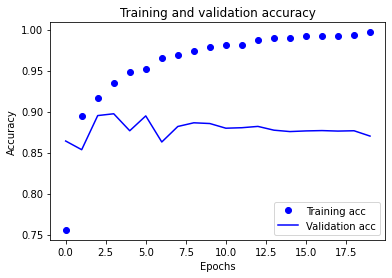

In [85]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [90]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-03 09:49:34.085035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/30 [=========================>....] - ETA: 0s - loss: 0.1863 - accuracy: 0.7400

2022-03-03 09:49:35.141419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 35ms/step - loss: 0.1799 - accuracy: 0.7529 - val_loss: 0.1189 - val_accuracy: 0.8704
Epoch 2/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1012 - accuracy: 0.8842 - val_loss: 0.1034 - val_accuracy: 0.8766
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.0742 - accuracy: 0.9185 - val_loss: 0.0924 - val_accuracy: 0.8876
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.0619 - accuracy: 0.9322 - val_loss: 0.0833 - val_accuracy: 0.8938


In [91]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0899 - accuracy: 0.8859
 Training accuracy: 0.9579333662986755
 Validation accuracy: 0.8938000202178955
 Testing accuracy: 0.8858800530433655
